In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/Shareddrives/Projects/sc/bt.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
%load_ext rpy2.ipython

In [ ]:

%%R
install.packages("tidyverse")
library(tidyverse)
install.packages("keras")
library(keras)


list.files(path = "/content/bt")

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpga52M9/downloaded_packages’



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


(as ‘lib’ is unspecified)







	‘/tmp/Rtmpga52M9/downloaded_packages’



[1] "test"  "train"


In [ ]:
%%R

# path to image folders
train_image_files_path <- "/content/bt/train"
test_image_files_path <- "/content/bt/test"

In [ ]:
%%R

# Classes in our data that we are trying to predict
tumor_list <- c("yes", "no")

# number of output classes
output_classes <- length(tumor_list)

channels <- 1

# The width and height of the images used for the analysis
img_width <- 124
img_height <- 124
target_size <- c(img_width, img_height)

In [ ]:
%%R

system("sudo apt-get -y install libmagick++-dev", intern=TRUE)
install.packages("magick", verbose=TRUE)
library(magick)

(as ‘lib’ is unspecified)











	‘/tmp/Rtmpga52M9/downloaded_packages’



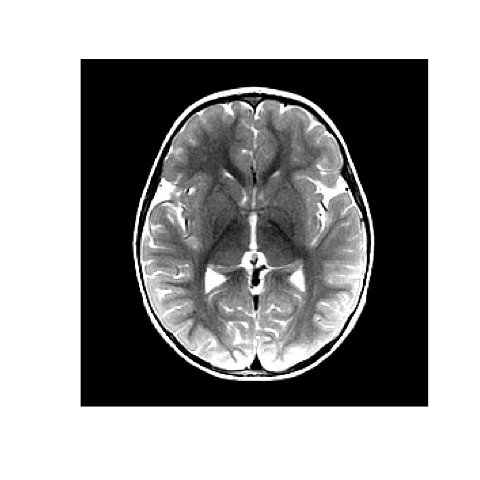

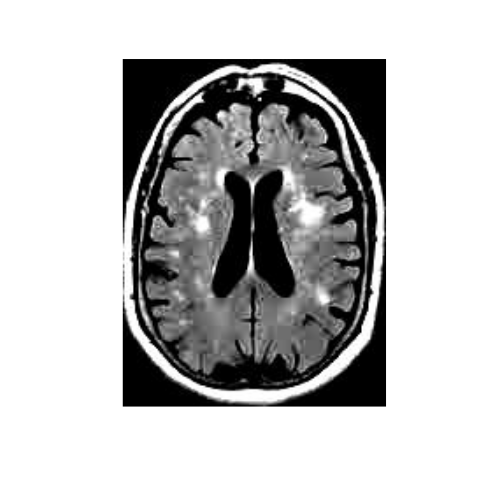

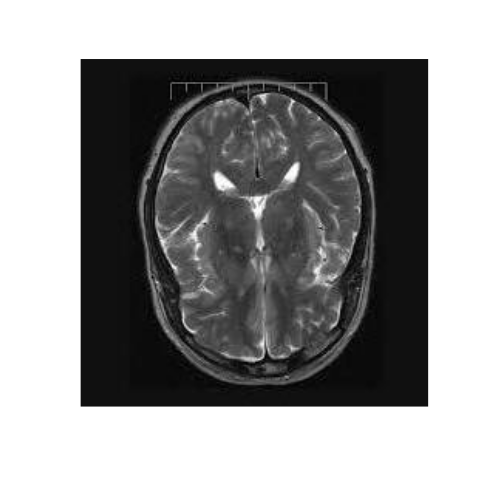

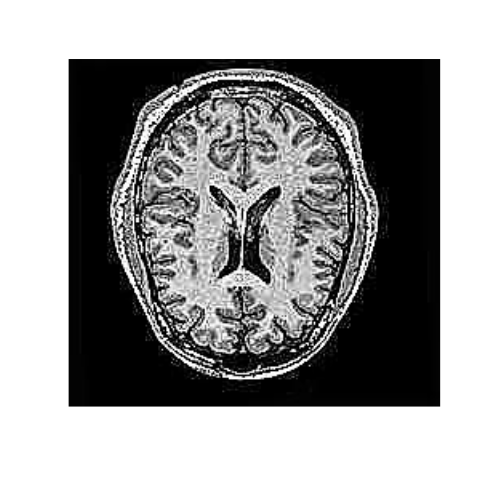

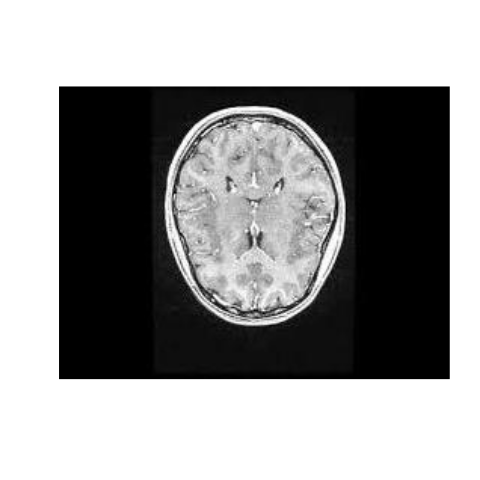

In [ ]:
%%R
library(magick)
a <- ('/content/bt/train/no/')
lista <- list.files("/content/bt/train/no")
count <- 0
for (i in lista){
    S <- paste(a, i, sep="")
    # print(S)
    current_image <- image_read(S)
    plot(current_image)
    if (count == 4){
      break
    }
    count = count + 1
}


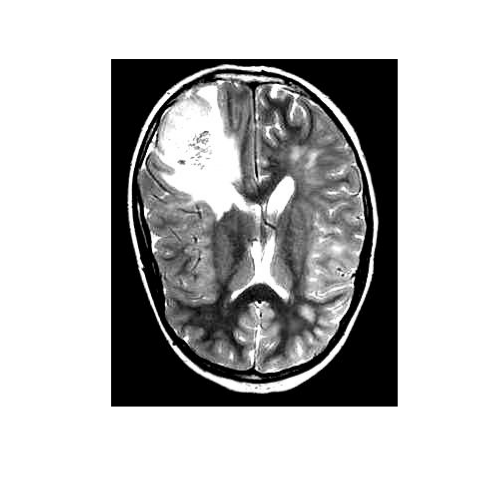

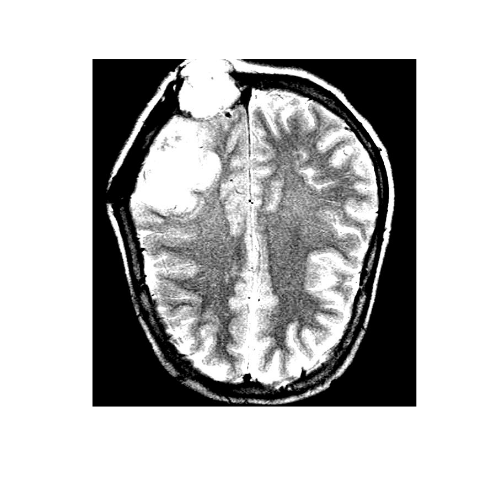

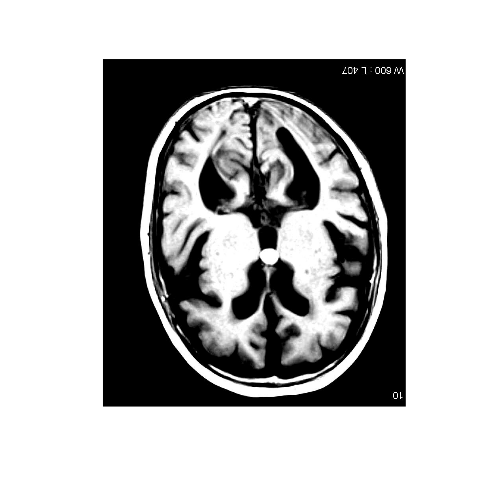

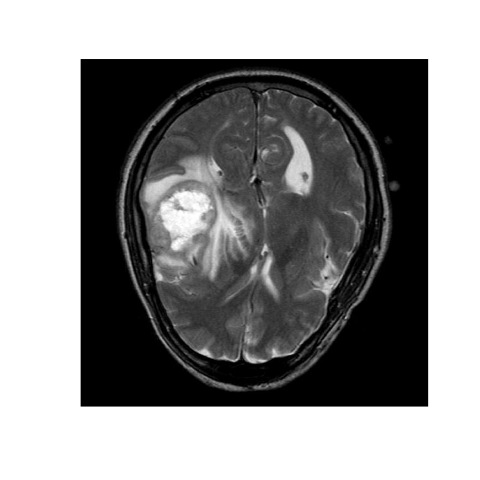

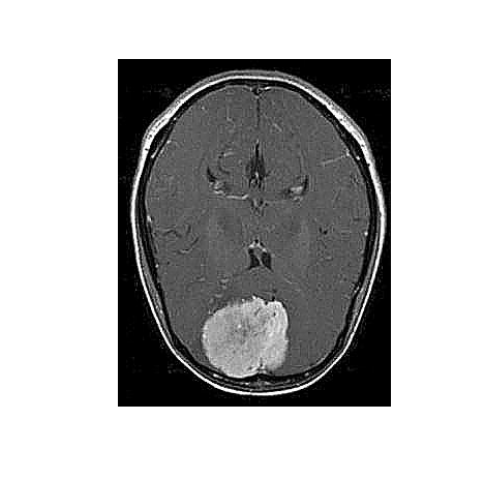

In [ ]:
%%R
library(magick)
b <- ('/content/bt/train/yes/')
listb <- list.files("/content/bt/train/yes")
count <- 0
for (i in listb){
    S <- paste(b, i, sep="")
    # print(S)
    current_image <- image_read(S)

    plot(current_image)

    if (count == 4){
      break
    }
    count = count + 1
}


In [ ]:
%%R
# image_data_generator used to scale the images and validation split
train_data_generator = image_data_generator(
  rescale = 1/255,
  validation_split = 0.2
)

test_data_generator <- image_data_generator(
  rescale = 1/255
)

# flow_from_directory() usage

# training images
train_image_array_generator <- flow_images_from_directory(train_image_files_path,
                                                    train_data_generator,
                                                    shuffle = TRUE,
                                                    color_mode = "grayscale",
                                                    target_size = target_size,
                                                    class_mode = "categorical",
                                                    classes = tumor_list,
                                                    subset = "training",
                                                    seed = 2020)

# validation images
valid_image_array_generator <- flow_images_from_directory(train_image_files_path,
                                                    train_data_generator,
                                                    shuffle = TRUE,
                                                    color_mode  = "grayscale",
                                                    target_size = target_size,
                                                    class_mode = "categorical",
                                                    classes = tumor_list,
                                                    subset = "validation",
                                                    seed = 2020)

test_image_array_generator <- flow_images_from_directory(test_image_files_path,
                                                   test_data_generator,
                                                   shuffle = FALSE,
                                                   color_mode = "grayscale",
                                                   target_size = target_size,
                                                   class_mode = "categorical",
                                                   classes = tumor_list,
                                                   seed = 2020)

# Print the classes in the data for reference
table(factor(train_image_array_generator$classes))
table(factor(test_image_array_generator$classes))


Found 2240 images belonging to 2 classes.
Found 560 images belonging to 2 classes.
Found 200 images belonging to 2 classes.

  0   1 
100 100 


In [ ]:
%%R
# number of training samples
train_samples <- train_image_array_generator$n
# number of validation samples
valid_samples <- valid_image_array_generator$n
# number of test samples
test_samples <- test_image_array_generator$n
# define batch size and number of epochs
batch_size <- 32
epochs <- 15

# DEFINE
# initialise model
model <- keras_model_sequential()
# hidden layers
model %>%
  # First convolution layer
  layer_conv_2d(filter = 32, kernel_size = c(2,2), padding = "same", input_shape = c(img_width, img_height, channels)) %>%
  layer_activation("relu") %>%

  # Second convolution layer
  layer_conv_2d(filter = 16, kernel_size = c(2,2), padding = "same") %>%
  layer_activation_leaky_relu(0.5) %>%
  layer_batch_normalization() %>%

  # First pooling layer
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  layer_dropout(0.25) %>%

  # Third convolution layer
  layer_conv_2d(filter = 8, kernel_size = c(2,2), padding = "same") %>%
  layer_activation_leaky_relu(0.5) %>%
  layer_batch_normalization() %>%

  # Fourth convolution layer
  layer_conv_2d(filter = 4, kernel_size = c(2,2), padding = "same") %>%
  layer_activation_leaky_relu(0.5) %>%
  layer_batch_normalization() %>%

  # Second pooling layer
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  layer_dropout(0.25) %>%

  # dense layer
  layer_flatten() %>%
  layer_dense(100) %>%
  layer_activation("relu") %>%
  layer_dropout(0.5) %>%

  # Outputs from dense layer are projected onto output layer
  layer_dense(output_classes) %>%
  layer_activation("softmax")

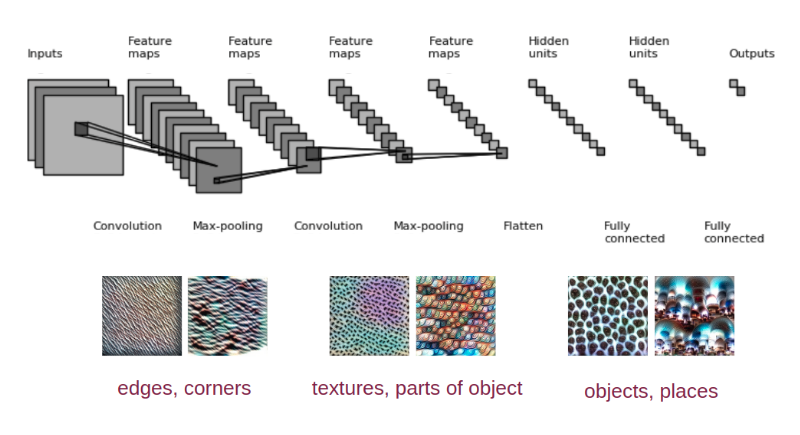

In [ ]:
%%R
print(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                  Output Shape               Param #    Trainable  
 conv2d_3 (Conv2D)             (None, 124, 124, 32)       160        Y          
 activation_2 (Activation)     (None, 124, 124, 32)       0          Y          
 conv2d_2 (Conv2D)             (None, 124, 124, 16)       2064       Y          
 leaky_re_lu_2 (LeakyReLU)     (None, 124, 124, 16)       0          Y          
 batch_normalization_2 (BatchN  (None, 124, 124, 16)      64         Y          
 ormalization)                                                                  
 max_pooling2d_1 (MaxPooling2D  (None, 62, 62, 16)        0          Y          
 )                                                                              
 dropout_2 (Dropout)           (None, 62, 62, 16)         0          Y          
 conv2d_1 (Conv2D)             (None, 62, 62, 8)          520        Y          
 leaky_r

In [ ]:
%%R
# compile
model %>% compile(
  loss = "categorical_crossentropy",
  optimizer = optimizer_adam(lr = 1e-3),
  metrics = "accuracy"
)

Epoch 1/15
70/70 - 17s - loss: 0.7915 - accuracy: 0.7205 - val_loss: 0.7327 - val_accuracy: 0.5055 - 17s/epoch - 239ms/step
Epoch 2/15
70/70 - 7s - loss: 0.4171 - accuracy: 0.8156 - val_loss: 1.0691 - val_accuracy: 0.5037 - 7s/epoch - 106ms/step
Epoch 3/15
70/70 - 9s - loss: 0.3283 - accuracy: 0.8576 - val_loss: 0.7027 - val_accuracy: 0.5974 - 9s/epoch - 123ms/step
Epoch 4/15
70/70 - 8s - loss: 0.2670 - accuracy: 0.8897 - val_loss: 0.7685 - val_accuracy: 0.6029 - 8s/epoch - 109ms/step
Epoch 5/15
70/70 - 7s - loss: 0.2349 - accuracy: 0.9022 - val_loss: 1.0768 - val_accuracy: 0.6324 - 7s/epoch - 106ms/step
Epoch 6/15
70/70 - 7s - loss: 0.1636 - accuracy: 0.9357 - val_loss: 0.3762 - val_accuracy: 0.8272 - 7s/epoch - 107ms/step
Epoch 7/15
70/70 - 7s - loss: 0.1441 - accuracy: 0.9384 - val_loss: 0.2107 - val_accuracy: 0.9099 - 7s/epoch - 107ms/step
Epoch 8/15
70/70 - 8s - loss: 0.1188 - accuracy: 0.9540 - val_loss: 0.2666 - val_accuracy: 0.8915 - 8s/epoch - 107ms/step
Epoch 9/15
70/70 - 9s 

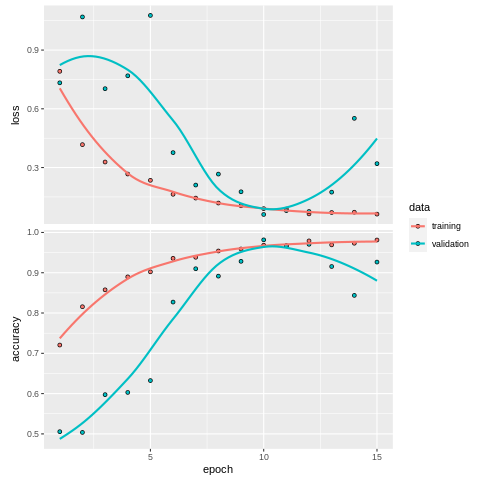

In [ ]:
%%R
fit <- model %>% fit_generator(
  # training data
  train_image_array_generator,

  # epochs
  steps_per_epoch = as.integer(train_samples / batch_size),
  epochs = epochs,

  # validation data
  validation_data = valid_image_array_generator,
  validation_steps = as.integer(valid_samples / batch_size),

  # print progress
  verbose = 2
)

options(repr.plot.width = 10, repr.plot.height = 10)
plot(fit)


In [ ]:
%%R

val_score <- model %>% evaluate_generator(valid_image_array_generator, steps = ceiling(valid_samples/batch_size))
val_score

score <- model %>% evaluate_generator(test_image_array_generator, steps = ceiling(test_samples/batch_size))
score

7/7 [==============================] - 1s 86ms/step - loss: 0.4555 - accuracy: 0.8900
     loss  accuracy 
0.4555363 0.8900000 


In [ ]:
%%R
#test_image_array_generator$reset
predictions <- model %>% predict_generator(test_image_array_generator, steps = ceiling(test_samples/batch_size))
# Predict the class by taking the column with the highest probability
y_pred <- apply(predictions, 1, which.max) - 1

y_actual <- test_image_array_generator$classes

#confusion matrix
table(y_actual, y_pred)

        y_pred
y_actual  0  1
       0 99  1
       1 21 79
